In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import lib

In [2]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Crawl data from website

In [3]:
import requests
from bs4 import BeautifulSoup

list_url = ['https://openaccess.thecvf.com/ICCV2019?day=2019-10-29',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-10-30',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-10-31',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-11-01']

In [4]:
with open("/content/drive/MyDrive/Colab Notebooks/NLP/Week2/title-2017.txt",'w',encoding = 'utf-8') as f:
  response = requests.get("https://openaccess.thecvf.com/ICCV2017")
  soup = BeautifulSoup(response.content, 'html.parser')
  titles = soup.findAll('dt', class_='ptitle')
  for title in titles:
    f.write(title.text + "\n")

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/NLP/Week2/title-2019.txt",'w',encoding = 'utf-8') as f:
  for url in list_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    titles = soup.findAll('dt', class_='ptitle')
    for title in titles:
      f.write(title.text + "\n")

# Preprocessing data

In [3]:
new_stopwords = ["image", "images", "video", "videos", "network", "networks", "deep", 
                 "neural", "learning", "using", "visual", "object", "based", "via", "model",
                 "representation", "training"]

stop_words = stopwords.words('english') + new_stopwords

In [4]:
def read_content(filename):
  paper_names = []
  
  with open(filename, "r") as f:
    content = f.readlines()
    f.close()

    for i in range(len(content)):
      paper_names.append(content[i])
    
  return paper_names

In [5]:
def statistic_keyword(collection_of_text, ngram_range):
  vectorizer = CountVectorizer(lowercase=True,
                               stop_words=stop_words,
                               ngram_range=ngram_range)
  y_label = "Keyword"
  count = sum((vectorizer.fit_transform(collection_of_text)).toarray())
  x = vectorizer.get_feature_names()
    
  return x, count

In [6]:
def statistic_2_contents(old_content, new_content, ngram_range):
    terms_old_year, count_old_year = statistic_keyword(old_content, ngram_range)
    terms_new_year, count_new_year = statistic_keyword(new_content, ngram_range)

    #  Statistic the growth in frequency of keyword
    for term in terms_old_year:
        if term in terms_new_year:
            # Formula: growth_frequency = old_frequency + (new_frequency - old_frequency)
            count_old_year[terms_old_year.index(term)] += count_new_year[terms_new_year.index(term)] - count_old_year[terms_old_year.index(term)]

    all_term = terms_old_year
    differences = list(count_old_year)
    for term in terms_new_year:
        if term not in terms_old_year:
            all_term.append(term)
            differences.append(count_new_year[terms_new_year.index(term)])

    # Sort all_term and differneces decreased base on differences
    differences, all_term = zip(*sorted(zip(differences, all_term), reverse=True))
    
    return differences, all_term

In [7]:
def plot_chart(differences, all_term, amount_of_term, xlabel, ylabel, title, full_file_name):
    # Plot this amount of term
    all_term = all_term[0:amount_of_term]
    differences = differences[0:amount_of_term]

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(y)):
            plt.text(x=x[i], y=i, s=x[i], ha = 'center', bbox = dict(facecolor = 'red', alpha =.8))

        # Add information about totel term used for this plot
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(x=x[0]*0.75, y=len(y)*0.85, s=f"Total keywords: {len(all_term)}", fontsize=30,
            verticalalignment='top', bbox=props)

    # Setting figure size
    plt.figure(figsize = (25, 40))

    # Making the bar chart on the data
    plt.barh(all_term, differences, align='center', height=0.8)

    # Calling the function to add value labels
    addlabels(differences, all_term)

    # plt.yticks(fontsize=1)

    # Name the title of x, y axes and the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Save the plot in pdf file type
    plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/NLP/Week2/{full_file_name}")

    # Visualizing the plot
    plt.show()

In [8]:
def statistic_and_plot_chart(old_content, new_content, ngram_range, amount_of_term, xlabel, ylabel, title, full_file_name):
  differences, all_term = statistic_2_contents(old_content, new_content, ngram_range)
  plot_chart(differences, all_term, amount_of_term, xlabel, ylabel, title, full_file_name)

In [9]:
data_2017 = "/content/drive/MyDrive/Colab Notebooks/NLP/Week2/title-2017.txt"
data_2019 = "/content/drive/MyDrive/Colab Notebooks/NLP/Week2/title-2019.txt"

paper_names_2017 = read_content(data_2017)
paper_names_2019 = read_content(data_2019)

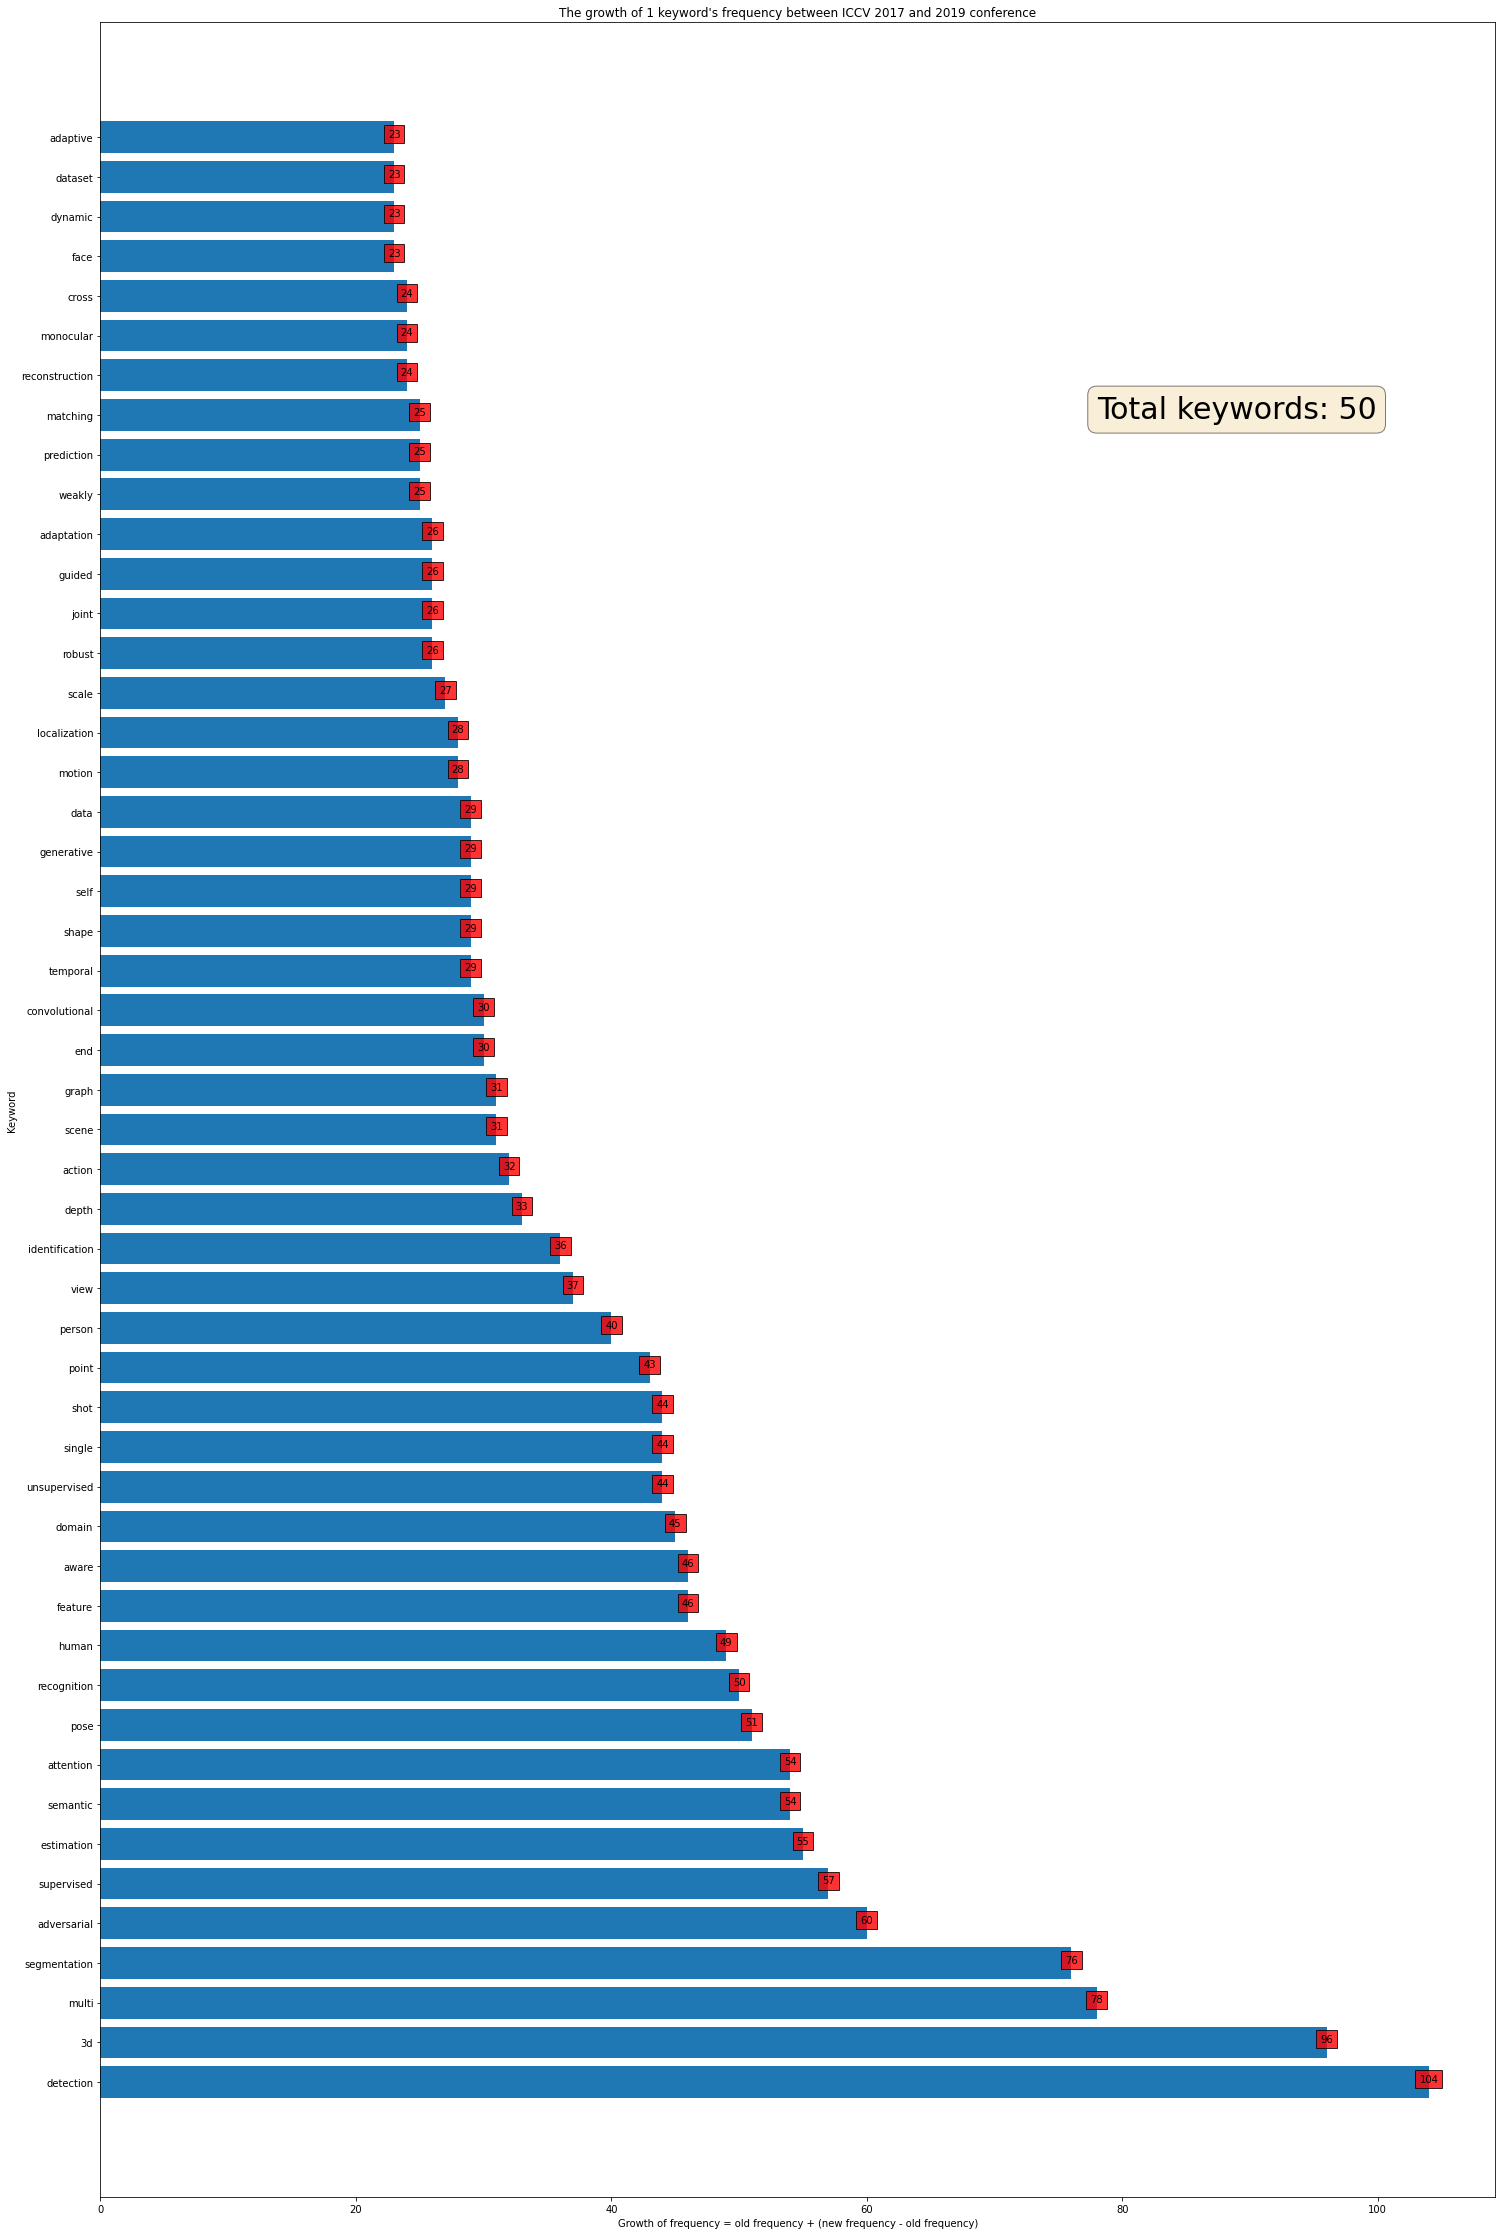

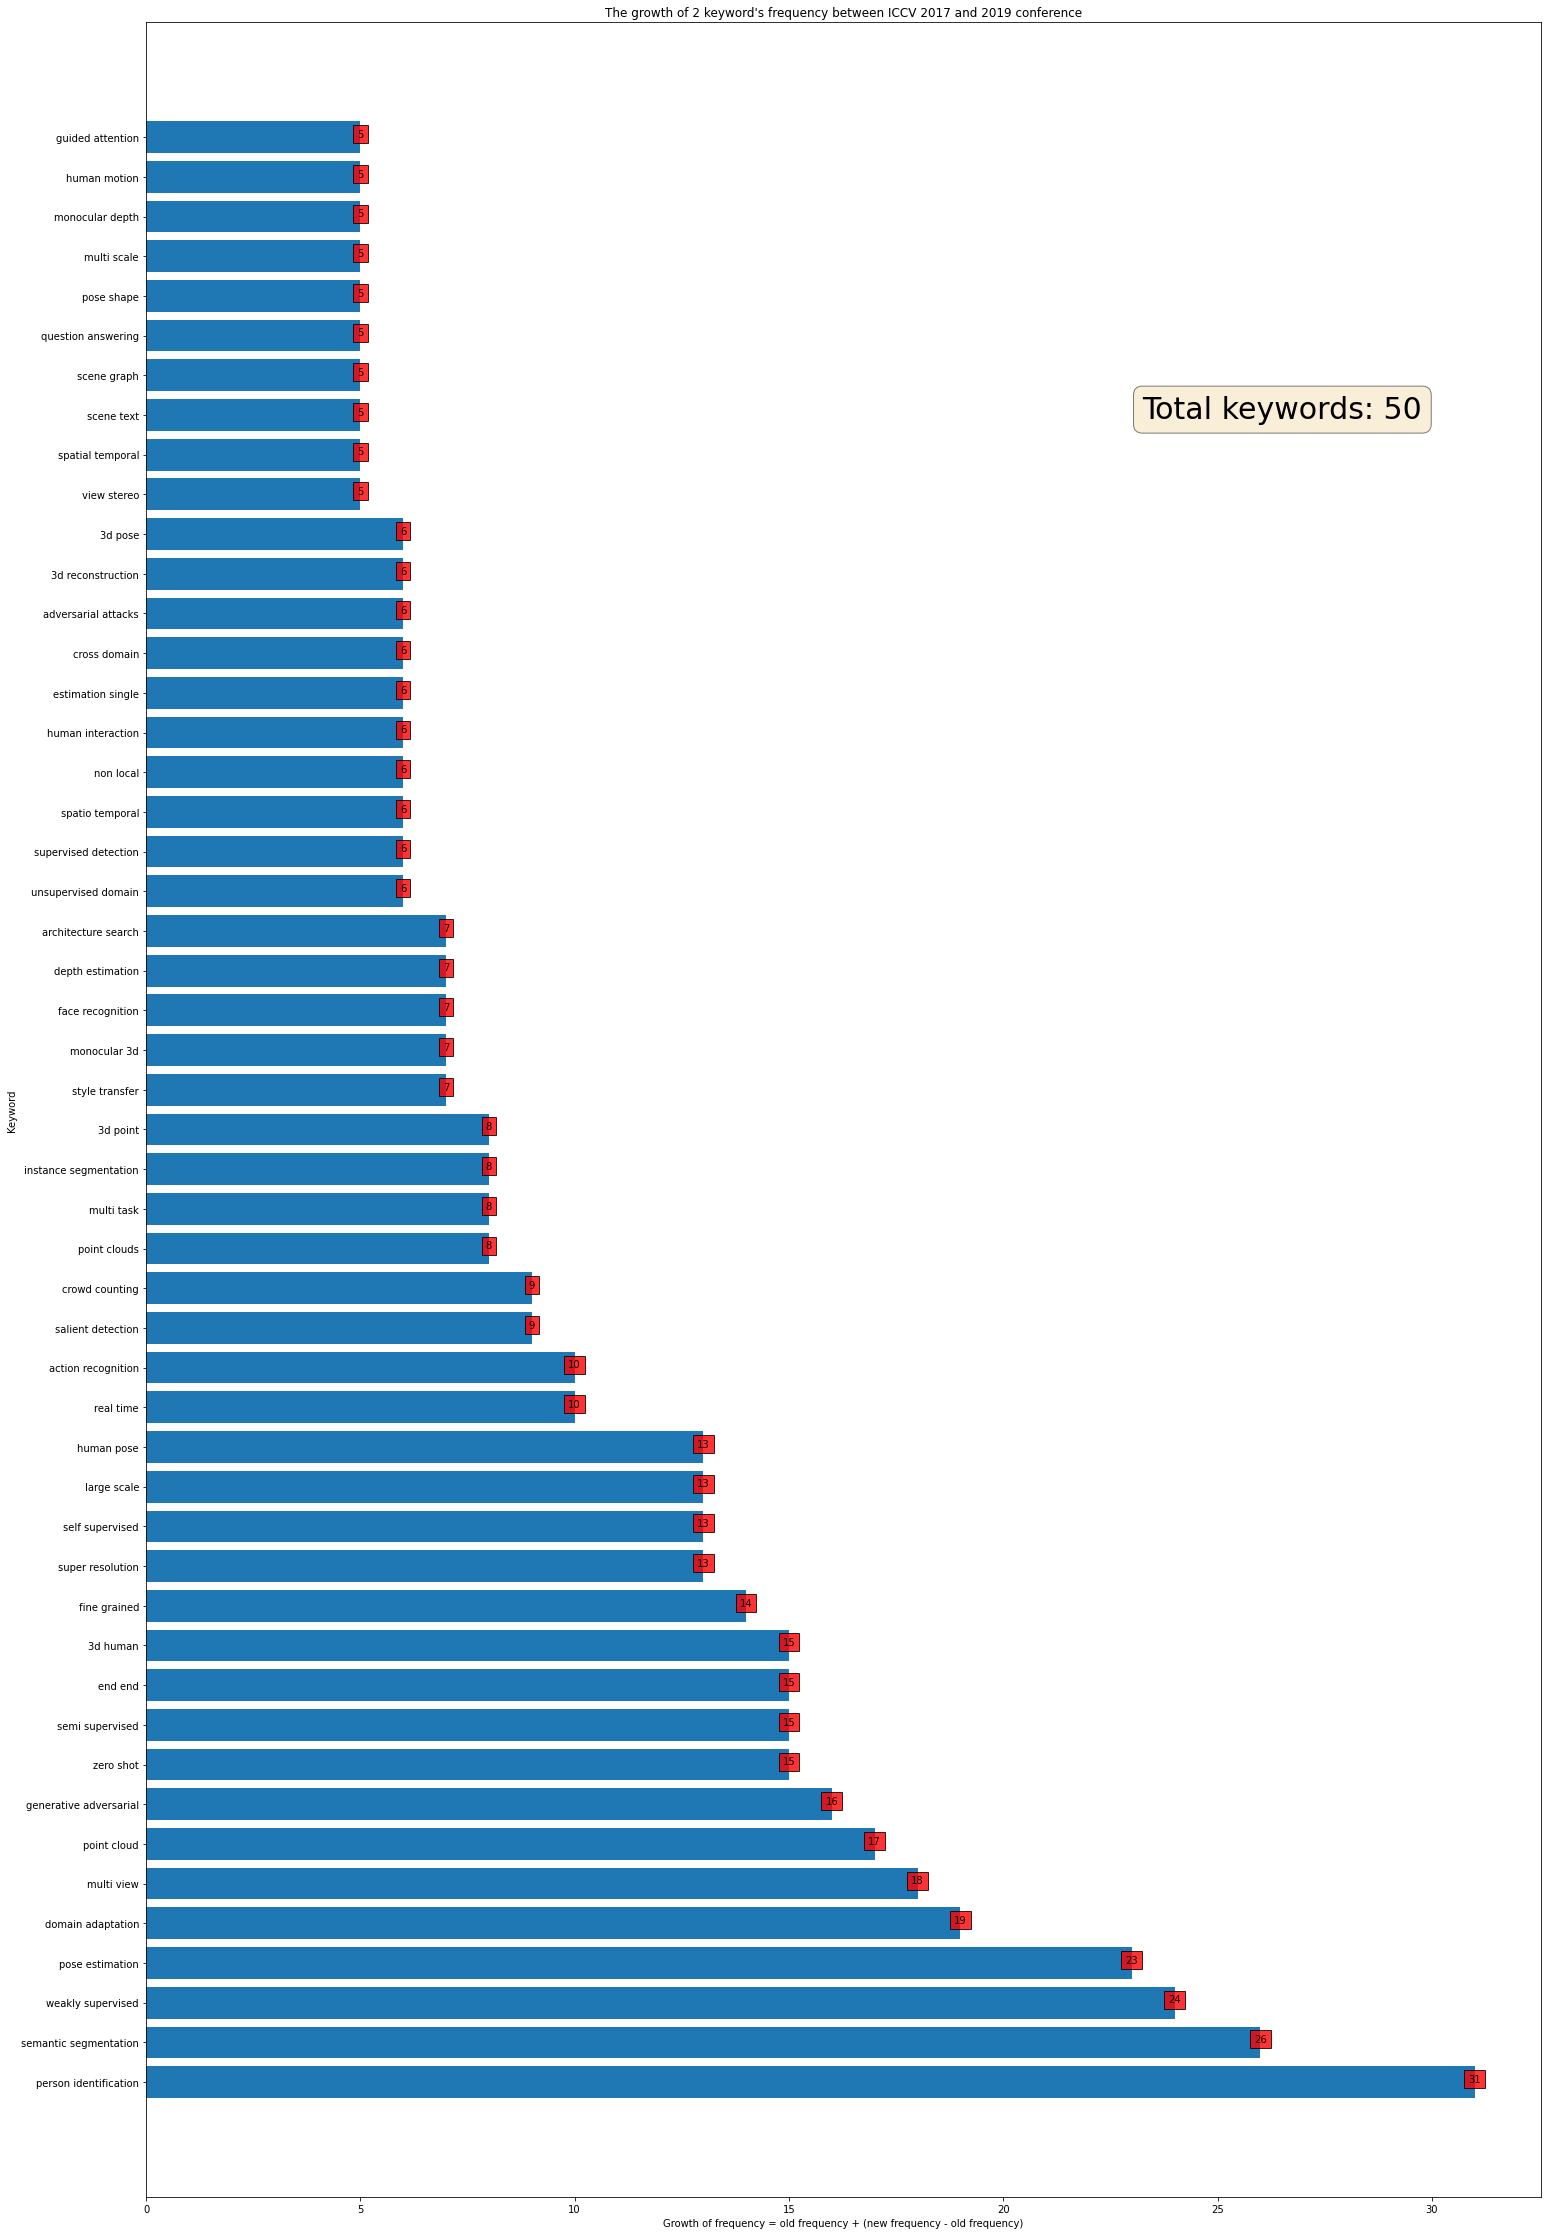

In [10]:
statistic_and_plot_chart(old_content=paper_names_2017, new_content=paper_names_2019, ngram_range=(1, 1),
                         amount_of_term=50, xlabel="Growth of frequency = old frequency + (new frequency - old frequency)", ylabel="Keyword", 
                         title="The growth of 1 keyword's frequency between ICCV 2017 and 2019 conference",
                         full_file_name="Frequency_growth_2017-2019_01term.pdf")

statistic_and_plot_chart(old_content=paper_names_2017, new_content=paper_names_2019, ngram_range=(2, 2),
                         amount_of_term=50, xlabel="Growth of frequency = old frequency + (new frequency - old frequency)", ylabel="Keyword", 
                         title="The growth of 2 keyword's frequency between ICCV 2017 and 2019 conference",
                         full_file_name="Frequency_growth_2017-2019_02term.pdf")